### Get data files from a URL
This notebook shows how to obtain data files from public URLs.  
If you want to distribute files (web developers) the files need to be in the webroot (i.e. http://FQDN/path/to/file/filename.txt)

Here we will do an example with a file that contains topographic data in XYZ format

In [1]:
#Step 1: import needed modules to interact with the internet
from urllib.request import urlopen # import a method that will get a file then open the file
import numpy  #import numpy
import pandas #import pandas
from math import sqrt

In [2]:
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://theodore-odroid.ttu.edu/pip-corner-sumps.txt' # 
elevationXYZ = urlopen(remote_url).read().decode().split() # Gets the file contents as a single vector, comma delimited, file is not retained locally

In [3]:
# Python primatives to structure the data
howmany = len(elevationXYZ) # how long is the vector?
nrow = int(howmany/3)
xyz = [[0 for j in range(3)] for j in range(nrow)] # null space to receive data define columnX

In [4]:
# Now will build xyz as a matrix with 3 columns
index = 0
for irow in range(0,nrow):
    xyz[irow][0]=float(elevationXYZ[index])
    xyz[irow][1]=float(elevationXYZ[index+1])
    xyz[irow][2]=float(elevationXYZ[index+2])
    index += 3 #increment the index

In [5]:
# xyz is now a 3-column float array and can now probably be treated as a data frame
df = pandas.DataFrame(xyz)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       774 non-null    float64
 1   1       774 non-null    float64
 2   2       774 non-null    float64
dtypes: float64(3)
memory usage: 18.3 KB


In [7]:
df.describe()

0           1           2
count  774.000000  774.000000  774.000000
mean    52.064621   48.770060    2.364341
std     30.883400   32.886277    1.497413
min     -2.113554  -11.360960    0.000000
25%     25.640786   21.809579    2.000000
50%     55.795821   49.059950    2.000000
75%     76.752290   75.015933    4.000000
max    111.726727  115.123931    4.000000

Text(0.5, 1.0, 'Simplest default with labels')

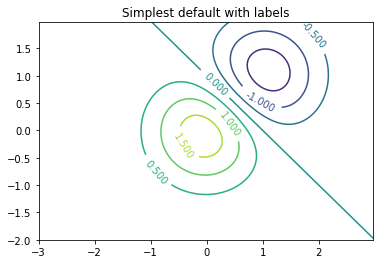

In [46]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

In [47]:
#X, Y = np.meshgrid(xyz[:][0], xyz[:][1])
#Z = xyz[:][2]
#fig, ax = plt.subplots()
#CS = ax.contour(X, Y, Z)
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Simplest default with labels')

In [64]:
#print(X)
#print(Y)
#print(Z)
print(len(Z[0]))
externalfile = open('gridded_data.txt','w')
what_to_write = str(len(X))+ " " + str(len(X[0])) + "\n"
externalfile.write(what_to_write)
for irow in range(0,len(X)):
    for jcol in range(0,len(X[0])):
        what_to_write = ','.join(map(repr, (X[irow,jcol],Y[irow,jcol],Z[irow,jcol]))) + "\n"
        externalfile.write(what_to_write)
externalfile.close()


240


Because the original data is irregular spaced elevations in xyz structure, to draw a contour map we need values on
a regular spaced grid. The process of interpolating observations onto such a grid is called gridding, go figure!

There are many elaborate gridding methods, we will just use an inverse distance weighting.

First lets define the grid based on the data, we can use the dataframe or the xyz vector

In [11]:
xlow = min(xyz[:][0])
xhigh = max(xyz[:][0])
ylow= min(xyz[:][1])
yhigh= max(xyz[:][1])
xlines = 10 # how many lines along x-axis
ylines = 10 # how many lines along y-axis
deltax = float((xhigh - xlow)/(xlines))
deltay = float((yhigh - ylow)/(ylines))
xgrid = np.arange(xlow*0.89, xhigh*(1.11), deltax) # build an array of xgrid values, the extension factors optional
ygrid = np.arange(ylow*0.89, yhigh*(1.11), deltay) # build an array of ygrid values
X, Y = np.meshgrid(xgrid, ygrid) # build a mesh for the plot call

In [12]:
print("blank")

blank


In [13]:
distance=[0 for i in range(nrow)]  #null array to store distances from grid coordinates to observations -- this object will get huge!
for irow in range(0,xlines):
    for jcol in range(0,ylines):
        rownum = 0
        for krow in range(0,nrow):
            distance[krow]=sqrt(((xgrid[jcol]-xyz[krow][0])**2)+((ygrid[irow]-xyz[krow][1])**2))
# need to insert test for grid same as observatio
        numerator = 0
        denominator = 0
        for iobs in range(0,nrow):
            numerator += xyz[iobs][2]
            


In [14]:
xyz

[[74.90959724, 93.21251922, 0.0],
 [75.17907367, 64.40278759, 0.0],
 [94.9935575, 93.07951286, 0.0],
 [95.26234119, 64.60091165, 0.0],
 [54.04976655, 64.21159095, 0.0],
 [54.52914363, 35.06934342, 0.0],
 [75.44993558, 34.93079513, 0.0],
 [75.09317373, 5.462959114, 0.0],
 [74.87357468, 10.43130083, 0.0],
 [74.86249082, 15.72938748, 0.0],
 [75.05853665, 22.01947989, 0.0],
 [75.46171218, 29.30157807, 0.0],
 [77.96043061, 34.91416933, 0.0],
 [81.72617316, 34.88923064, 0.0],
 [85.28201505, 35.19680785, 0.0],
 [89.46686618, 34.83796777, 0.0],
 [92.60429223, 35.14831595, 0.0],
 [95.5332031, 35.12891918, 0.0],
 [78.52709312, 64.04948945, 0.0],
 [83.33887527, 64.01762334, 0.0],
 [86.89610264, 63.66293972, 0.0],
 [92.54333098, 64.28779251, 0.0],
 [95.65235463, 78.17448772, 0.0],
 [95.63780706, 85.12822644, 0.0],
 [95.41890076, 89.76543774, 0.0],
 [95.88095931, 68.9014506, 0.0],
 [75.17076077, 68.37635258, 0.0],
 [74.94769802, 75.00034637, 0.0],
 [74.93592142, 80.62956343, 0.0],
 [74.71285867, 87

In [118]:
xyz[:][2]

[0.0, 93.07951286, 94.9935575]